<a href="https://colab.research.google.com/github/NeshPk/NeshPk/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 【Problem 1 】 Ragrange's undetermined multiplier method

In [1]:
import numpy as np

class ScratchSVMClassifier():
    """
    SVM classifier implemented from scratch.

    Parameters
    ----------
    num_iter : int
        Number of iterations
    lr : float
        Learning rate
    kernel : str
        Type of kernel function. 'linear' or 'poly'
    threshold : float
        Threshold for selecting support vectors
    verbose : bool
        True to output learning process

    Attributes
    ----------
    self.n_support_vectors : int
        Number of support vectors
    self.index_support_vectors : ndarray, shape (n_support_vectors,)
        Indices of support vectors
    self.X_sv : ndarray, shape(n_support_vectors, n_features)
        Feature vectors of support vectors
    self.lam_sv : ndarray, shape(n_support_vectors, 1)
        Lagrange multipliers of support vectors
    self.y_sv : ndarray, shape(n_support_vectors, 1)
        Labels of support vectors

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.lam = None

    def _linear_kernel(self, X1, X2):
        """
        Linear kernel function

        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Samples
        X2 : ndarray, shape (n_samples2, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples1, n_samples2)
            Kernel matrix
        """
        return np.dot(X1, X2.T)

    def _kernel_function(self, X1, X2):
        """
        Select kernel function

        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Samples
        X2 : ndarray, shape (n_samples2, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples1, n_samples2)
            Kernel matrix
        """
        if self.kernel == 'linear':
            return self._linear_kernel(X1, X2)
        elif self.kernel == 'poly':
            # Polynomial kernel implementation (degree=2 assumed)
            gamma = 1.0
            coef0 = 1.0
            return (gamma * np.dot(X1, X2.T) + coef0) ** 2
        else:
            raise ValueError("Invalid kernel type.")

    def _update_lagrange_multipliers(self, X, y):
        """
        Update Lagrange multipliers

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples, )
            Training data correct values
        """
        n_samples = X.shape[0]
        if self.lam is None:
            self.lam = np.zeros(n_samples)

        for i in range(n_samples):
            update = 1 - np.sum(self.lam * y[i] * y * self._kernel_function(X[i].reshape(1, -1), X).flatten())
            self.lam[i] += self.lr * update
            if self.lam[i] < 0:
                self.lam[i] = 0

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If validation data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples, )
            Training data correct values
        X_val : ndarray, shape (n_samples, n_features)
            Validation data features
        y_val : ndarray, shape (n_samples, )
            Validation data correct values
        """
        y = y.astype(np.int) # Convert labels to integer type
        n_samples = X.shape[0]
        self.lam = np.random.rand(n_samples) # Initialize Lagrange multipliers

        for i in range(self.iter):
            self._update_lagrange_multipliers(X, y)
            if self.verbose:
                print(f"Iteration {i+1}/{self.iter}")

        # Get indices of support vectors
        self.index_support_vectors = np.where(self.lam > self.threshold)[0]
        self.n_support_vectors = len(self.index_support_vectors)
        self.X_sv = X[self.index_support_vectors]
        self.y_sv = y[self.index_support_vectors]
        self.lam_sv = self.lam[self.index_support_vectors]

        if self.verbose:
            print(f"Number of support vectors: {self.n_support_vectors}")
            print("Support vector indices:", self.index_support_vectors)

    def predict(self, X):
        """
        Estimate labels using the SVM classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples, 1)
            Estimated results by the SVM classifier
        """
        if not hasattr(self, 'X_sv'):
            raise Exception("Fit the model first.")

        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)

        for i in range(n_samples):
            kernel_values = self._kernel_function(X[i].reshape(1, -1), self.X_sv)
            decision_function = np.sum(self.lam_sv * self.y_sv * kernel_values.flatten())
            y_pred[i] = np.sign(decision_function)

        return np.sign(y_pred).astype(np.int)

##### 【Problem 2 】 Support vector determination

In [2]:
import numpy as np

class ScratchSVMClassifier():
    """
    SVM classifier implemented from scratch.

    Parameters
    ----------
    num_iter : int
        Number of iterations
    lr : float
        Learning rate
    kernel : str
        Type of kernel function. 'linear' or 'poly'
    threshold : float
        Threshold for selecting support vectors
    verbose : bool
        True to output learning process

    Attributes
    ----------
    self.n_support_vectors : int
        Number of support vectors
    self.index_support_vectors : ndarray, shape (n_support_vectors,)
        Indices of support vectors
    self.X_sv : ndarray, shape(n_support_vectors, n_features)
        Feature vectors of support vectors
    self.lam_sv : ndarray, shape(n_support_vectors, 1)
        Lagrange multipliers of support vectors
    self.y_sv : ndarray, shape(n_support_vectors, 1)
        Labels of support vectors

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.lam = None

    def _linear_kernel(self, X1, X2):
        """
        Linear kernel function

        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Samples
        X2 : ndarray, shape (n_samples2, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples1, n_samples2)
            Kernel matrix
        """
        return np.dot(X1, X2.T)

    def _kernel_function(self, X1, X2):
        """
        Select kernel function

        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Samples
        X2 : ndarray, shape (n_samples2, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples1, n_samples2)
            Kernel matrix
        """
        if self.kernel == 'linear':
            return self._linear_kernel(X1, X2)
        elif self.kernel == 'poly':
            # Polynomial kernel implementation (degree=2 assumed)
            gamma = 1.0
            coef0 = 1.0
            return (gamma * np.dot(X1, X2.T) + coef0) ** 2
        else:
            raise ValueError("Invalid kernel type.")

    def _update_lagrange_multipliers(self, X, y):
        """
        Update Lagrange multipliers

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples, )
            Training data correct values
        """
        n_samples = X.shape[0]
        if self.lam is None:
            self.lam = np.zeros(n_samples)

        for i in range(n_samples):
            update = 1 - np.sum(self.lam * y[i] * y * self._kernel_function(X[i].reshape(1, -1), X).flatten())
            self.lam[i] += self.lr * update
            if self.lam[i] < 0:
                self.lam[i] = 0

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If validation data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples, )
            Training data correct values
        X_val : ndarray, shape (n_samples, n_features)
            Validation data features
        y_val : ndarray, shape (n_samples, )
            Validation data correct values
        """
        y = y.astype(np.int) # Convert labels to integer type
        n_samples = X.shape[0]
        self.lam = np.random.rand(n_samples) # Initialize Lagrange multipliers

        for i in range(self.iter):
            self._update_lagrange_multipliers(X, y)
            if self.verbose:
                print(f"Iteration {i+1}/{self.iter}")

        # Determine support vectors based on the threshold
        self.index_support_vectors = np.where(self.lam > self.threshold)[0]
        self.n_support_vectors = len(self.index_support_vectors)
        self.X_sv = X[self.index_support_vectors]
        self.y_sv = y[self.index_support_vectors]
        self.lam_sv = self.lam[self.index_support_vectors].reshape(-1, 1) # Reshape to (n_support_vectors, 1)

        if self.verbose:
            print(f"Number of support vectors: {self.n_support_vectors}")
            print("Support vector indices:", self.index_support_vectors)

    def predict(self, X):
        """
        Estimate labels using the SVM classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples, 1)
            Estimated results by the SVM classifier
        """
        if not hasattr(self, 'X_sv'):
            raise Exception("Fit the model first.")

        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)

        for i in range(n_samples):
            kernel_values = self._kernel_function(X[i].reshape(1, -1), self.X_sv)
            decision_function = np.sum(self.lam_sv.flatten() * self.y_sv * kernel_values.flatten())
            y_pred[i] = np.sign(decision_function)

        return np.sign(y_pred).astype(np.int)

##### 【Problem 3 】 Estimated

In [3]:
import numpy as np

class ScratchSVMClassifier():
    """
    SVM classifier implemented from scratch.

    Parameters
    ----------
    num_iter : int
        Number of iterations
    lr : float
        Learning rate
    kernel : str
        Type of kernel function. 'linear' or 'poly'
    threshold : float
        Threshold for selecting support vectors
    verbose : bool
        True to output learning process

    Attributes
    ----------
    self.n_support_vectors : int
        Number of support vectors
    self.index_support_vectors : ndarray, shape (n_support_vectors,)
        Indices of support vectors
    self.X_sv : ndarray, shape(n_support_vectors, n_features)
        Feature vectors of support vectors
    self.lam_sv : ndarray, shape(n_support_vectors, 1)
        Lagrange multipliers of support vectors
    self.y_sv : ndarray, shape(n_support_vectors, 1)
        Labels of support vectors

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.lam = None

    def _linear_kernel(self, X1, X2):
        """
        Linear kernel function

        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Samples
        X2 : ndarray, shape (n_samples2, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples1, n_samples2)
            Kernel matrix
        """
        return np.dot(X1, X2.T)

    def _kernel_function(self, X1, X2):
        """
        Select kernel function

        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Samples
        X2 : ndarray, shape (n_samples2, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples1, n_samples2)
            Kernel matrix
        """
        if self.kernel == 'linear':
            return self._linear_kernel(X1, X2)
        elif self.kernel == 'poly':
            # Polynomial kernel implementation (degree=2 assumed)
            gamma = 1.0
            coef0 = 1.0
            return (gamma * np.dot(X1, X2.T) + coef0) ** 2
        else:
            raise ValueError("Invalid kernel type.")

    def _update_lagrange_multipliers(self, X, y):
        """
        Update Lagrange multipliers

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples, )
            Training data correct values
        """
        n_samples = X.shape[0]
        if self.lam is None:
            self.lam = np.zeros(n_samples)

        for i in range(n_samples):
            update = 1 - np.sum(self.lam * y[i] * y * self._kernel_function(X[i].reshape(1, -1), X).flatten())
            self.lam[i] += self.lr * update
            if self.lam[i] < 0:
                self.lam[i] = 0

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If validation data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples, )
            Training data correct values
        X_val : ndarray, shape (n_samples, n_features)
            Validation data features
        y_val : ndarray, shape (n_samples, )
            Validation data correct values
        """
        y = y.astype(np.int) # Convert labels to integer type
        n_samples = X.shape[0]
        self.lam = np.random.rand(n_samples) # Initialize Lagrange multipliers

        for i in range(self.iter):
            self._update_lagrange_multipliers(X, y)
            if self.verbose:
                print(f"Iteration {i+1}/{self.iter}")

        # Determine support vectors based on the threshold
        self.index_support_vectors = np.where(self.lam > self.threshold)[0]
        self.n_support_vectors = len(self.index_support_vectors)
        self.X_sv = X[self.index_support_vectors]
        self.y_sv = y[self.index_support_vectors].reshape(-1, 1)
        self.lam_sv = self.lam[self.index_support_vectors].reshape(-1, 1)

        if self.verbose:
            print(f"Number of support vectors: {self.n_support_vectors}")
            print("Support vector indices:", self.index_support_vectors)

    def predict(self, X):
        """
        Estimate labels using the SVM classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples, 1)
            Estimated results by the SVM classifier
        """
        if not hasattr(self, 'X_sv'):
            raise Exception("Fit the model first.")

        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)

        for i in range(n_samples):
            # Calculate kernel values between the data to predict and support vectors
            kernel_values = self._kernel_function(X[i].reshape(1, -1), self.X_sv)

            # Calculate the decision function
            decision_function = np.sum(self.lam_sv.flatten() * self.y_sv.flatten() * kernel_values.flatten())

            # Predict the label based on the sign of the decision function
            y_pred[i] = np.sign(decision_function)

        return np.sign(y_pred).astype(np.int).reshape(-1, 1)

##### 【Problem 4 】 Learning and estimation

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

class ScratchSVMClassifier():
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.lam = None

    def _linear_kernel(self, X1, X2):
        return np.dot(X1, X2.T)

    def _kernel_function(self, X1, X2):
        if self.kernel == 'linear':
            return self._linear_kernel(X1, X2)
        elif self.kernel == 'poly':
            gamma = 1.0
            coef0 = 1.0
            return (gamma * np.dot(X1, X2.T) + coef0) ** 2
        else:
            raise ValueError("Invalid kernel type.")

    def _update_lagrange_multipliers(self, X, y):
        n_samples = X.shape[0]
        if self.lam is None:
            self.lam = np.zeros(n_samples)

        for i in range(n_samples):
            update = 1 - np.sum(self.lam * y[i] * y * self._kernel_function(X[i].reshape(1, -1), X).flatten())
            self.lam[i] += self.lr * update
            if self.lam[i] < 0:
                self.lam[i] = 0

    def fit(self, X, y, X_val=None, y_val=None):
        y = y.astype(int)
        n_samples = X.shape[0]
        self.lam = np.random.rand(n_samples)

        for i in range(self.iter):
            self._update_lagrange_multipliers(X, y)
            if self.verbose:
                print(f"Iteration {i+1}/{self.iter}")

        self.index_support_vectors = np.where(self.lam > self.threshold)[0]
        self.n_support_vectors = len(self.index_support_vectors)
        self.X_sv = X[self.index_support_vectors]
        self.y_sv = y[self.index_support_vectors].reshape(-1, 1)
        self.lam_sv = self.lam[self.index_support_vectors].reshape(-1, 1)

        if self.verbose:
            print(f"Number of support vectors: {self.n_support_vectors}")
            print("Support vector indices:", self.index_support_vectors)

    def predict(self, X):
        if not hasattr(self, 'X_sv'):
            raise Exception("Fit the model first.")

        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)

        for i in range(n_samples):
            kernel_values = self._kernel_function(X[i].reshape(1, -1), self.X_sv)
            decision_function = np.sum(self.lam_sv.flatten() * self.y_sv.flatten() * kernel_values.flatten())
            y_pred[i] = np.sign(decision_function)

        return np.sign(y_pred).astype(int).reshape(-1, 1)

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=2, random_state=42)
y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scratch_svm = ScratchSVMClassifier(num_iter=100, lr=0.01, kernel='linear', verbose=True)
scratch_svm.fit(X_train, y_train)
y_pred_scratch = scratch_svm.predict(X_test)

sklearn_svm = SVC(kernel='linear')
sklearn_svm.fit(X_train, y_train)
y_pred_sklearn = sklearn_svm.predict(X_test)

accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
precision_scratch = precision_score(y_test, y_pred_scratch)
recall_scratch = recall_score(y_test, y_pred_scratch)

print("\n--- Scratch Implementation ---")
print(f"Accuracy: {accuracy_scratch}")
print(f"Precision: {precision_scratch}")
print(f"Recall: {recall_scratch}")
print(f"Number of support vectors: {scratch_svm.n_support_vectors}")

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)

print("\n--- scikit-learn Implementation ---")
print(f"Accuracy: {accuracy_sklearn}")
print(f"Precision: {precision_sklearn}")
print(f"Recall: {recall_sklearn}")


Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
Iteration 45/100
Iteration 46/100
Iteration 47/100
Iteration 48/100
Iteration 49/100
Iteration 50/100
Iteration 51/100
Iteration 52/100
Iteration 53/100
Iteration 54/100
Iteration 55/100
Iteration 56/100
Iteration 57/100
Iteration 58/100
Iteration 59/100
Iterat

##### 【Problem 5 】 Visualization of decision area

<ipython-input-5-f5f5aa98e9f5>:207: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


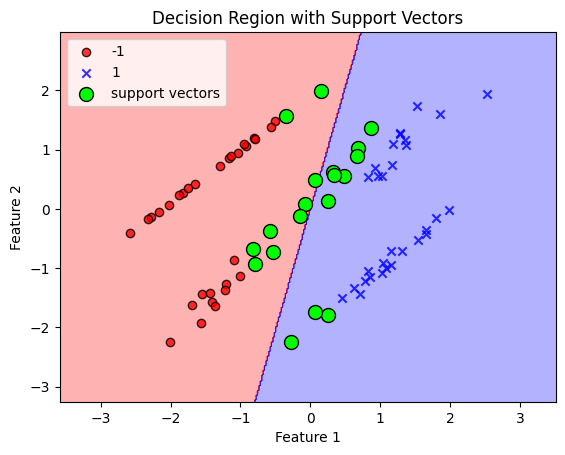

<ipython-input-5-f5f5aa98e9f5>:207: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


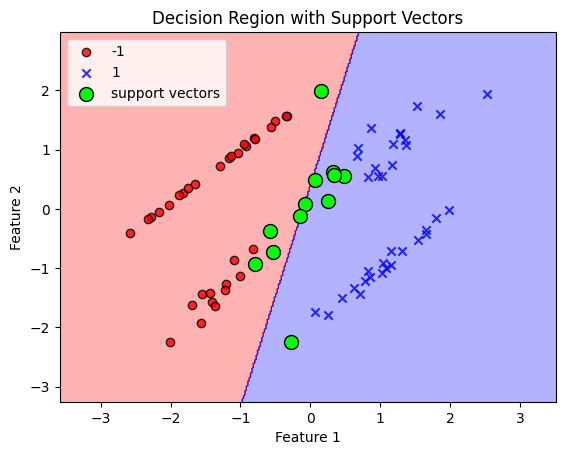


--- Scratch Implementation ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Number of support vectors: 19

--- scikit-learn Implementation ---
Accuracy: 0.95
Precision: 0.9
Recall: 1.0
Number of support vectors: 12


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap

class ScratchSVMClassifier():
    """
    SVM classifier implemented from scratch.

    Parameters
    ----------
    num_iter : int
        Number of iterations
    lr : float
        Learning rate
    kernel : str
        Type of kernel function. 'linear' or 'poly'
    threshold : float
        Threshold for selecting support vectors
    verbose : bool
        True to output learning process

    Attributes
    ----------
    self.n_support_vectors : int
        Number of support vectors
    self.index_support_vectors : ndarray, shape (n_support_vectors,)
        Indices of support vectors
    self.X_sv : ndarray, shape(n_support_vectors, n_features)
        Feature vectors of support vectors
    self.lam_sv : ndarray, shape(n_support_vectors, 1)
        Lagrange multipliers of support vectors
    self.y_sv : ndarray, shape(n_support_vectors, 1)
        Labels of support vectors

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.lam = None
        self.X_sv = None
        self.y_sv = None
        self.lam_sv = None
        self.index_support_vectors = None
        self.n_support_vectors = None

    def _linear_kernel(self, X1, X2):
        """
        Linear kernel function

        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Samples
        X2 : ndarray, shape (n_samples2, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples1, n_samples2)
            Kernel matrix
        """
        return np.dot(X1, X2.T)

    def _kernel_function(self, X1, X2):
        """
        Select kernel function

        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Samples
        X2 : ndarray, shape (n_samples2, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples1, n_samples2)
            Kernel matrix
        """
        if self.kernel == 'linear':
            return self._linear_kernel(X1, X2)
        elif self.kernel == 'poly':
            # Polynomial kernel implementation (degree=2 assumed)
            gamma = 1.0
            coef0 = 1.0
            return (gamma * np.dot(X1, X2.T) + coef0) ** 2
        else:
            raise ValueError("Invalid kernel type.")

    def _update_lagrange_multipliers(self, X, y):
        """
        Update Lagrange multipliers

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples, )
            Training data correct values
        """
        n_samples = X.shape[0]
        if self.lam is None:
            self.lam = np.zeros(n_samples)

        for i in range(n_samples):
            update = 1 - np.sum(self.lam * y[i] * y * self._kernel_function(X[i].reshape(1, -1), X).flatten())
            self.lam[i] += self.lr * update
            if self.lam[i] < 0:
                self.lam[i] = 0

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If validation data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples, )
            Training data correct values
        X_val : ndarray, shape (n_samples, n_features)
            Validation data features
        y_val : ndarray, shape (n_samples, )
            Validation data correct values
        """
        y = y.astype(int) # Convert labels to integer type
        n_samples = X.shape[0]
        self.lam = np.random.rand(n_samples) # Initialize Lagrange multipliers

        for i in range(self.iter):
            self._update_lagrange_multipliers(X, y)
            if self.verbose:
                print(f"Iteration {i+1}/{self.iter}")

        # Determine support vectors based on the threshold
        self.index_support_vectors = np.where(self.lam > self.threshold)[0]
        self.n_support_vectors = len(self.index_support_vectors)
        self.X_sv = X[self.index_support_vectors]
        self.y_sv = y[self.index_support_vectors].reshape(-1, 1)
        self.lam_sv = self.lam[self.index_support_vectors].reshape(-1, 1)

        if self.verbose:
            print(f"Number of support vectors: {self.n_support_vectors}")
            print("Support vector indices:", self.index_support_vectors)

    def predict(self, X):
        """
        Estimate labels using the SVM classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples, 1)
            Estimated results by the SVM classifier
        """
        if not hasattr(self, 'X_sv'):
            raise Exception("Fit the model first.")

        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)

        for i in range(n_samples):
            # Calculate kernel values between the data to predict and support vectors
            kernel_values = self._kernel_function(X[i].reshape(1, -1), self.X_sv)

            # Calculate the decision function
            decision_function = np.sum(self.lam_sv.flatten() * self.y_sv.flatten() * kernel_values.flatten())

            # Predict the label based on the sign of the decision function
            y_pred[i] = np.sign(decision_function)

        return np.sign(y_pred).astype(int).reshape(-1, 1)

# Visualization function
def plot_decision_regions_svm(X, y, classifier, support_vectors=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 'x', '^', 's', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight support vectors
    if support_vectors is not None:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    c='lime', marker='o', s=100, edgecolor='black', label='support vectors')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.title('Decision Region with Support Vectors')
    plt.show()

# Prepare Simple Dataset 1
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=2, random_state=42)
y[y == 0] = -1  # Convert labels to -1, 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict with the Scratch implementation
scratch_svm = ScratchSVMClassifier(num_iter=100, lr=0.01, kernel='linear', verbose=False)
scratch_svm.fit(X_train, y_train)
y_pred_scratch = scratch_svm.predict(X_test)

# Train with scikit-learn for comparison visualization
sklearn_svm = SVC(kernel='linear')
sklearn_svm.fit(X_train, y_train)

# Visualize decision regions and support vectors (Scratch implementation)
plot_decision_regions_svm(X_train, y_train, scratch_svm, support_vectors=scratch_svm.X_sv)

# Visualize decision regions and support vectors (scikit-learn implementation)
plot_decision_regions_svm(X_train, y_train, sklearn_svm, support_vectors=sklearn_svm.support_vectors_)

# Calculate and display evaluation metrics (Scratch implementation)
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
precision_scratch = precision_score(y_test, y_pred_scratch)
recall_scratch = recall_score(y_test, y_pred_scratch)

print("\n--- Scratch Implementation ---")
print(f"Accuracy: {accuracy_scratch}")
print(f"Precision: {precision_scratch}")
print(f"Recall: {recall_scratch}")
print(f"Number of support vectors: {scratch_svm.n_support_vectors}")

# Calculate and display evaluation metrics (scikit-learn)
y_pred_sklearn = sklearn_svm.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)

print("\n--- scikit-learn Implementation ---")
print(f"Accuracy: {accuracy_sklearn}")
print(f"Precision: {precision_sklearn}")
print(f"Recall: {recall_sklearn}")
print(f"Number of support vectors: {sklearn_svm.n_support_.sum()}")

##### 【Problem 6 】 (Advance Challenge) Polynomial kernel function creation

Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
Iteration 45/100
Iteration 46/100
Iteration 47/100
Iteration 48/100
Iteration 49/100
Iteration 50/100
Iteration 51/100
Iteration 52/100
Iteration 53/100
Iteration 54/100
Iteration 55/100
Iteration 56/100
Iteration 57/100
Iteration 58/100
Iteration 59/100
Iterat

C:\Users\ericg\AppData\Local\Temp\ipykernel_17228\3760780184.py:231: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


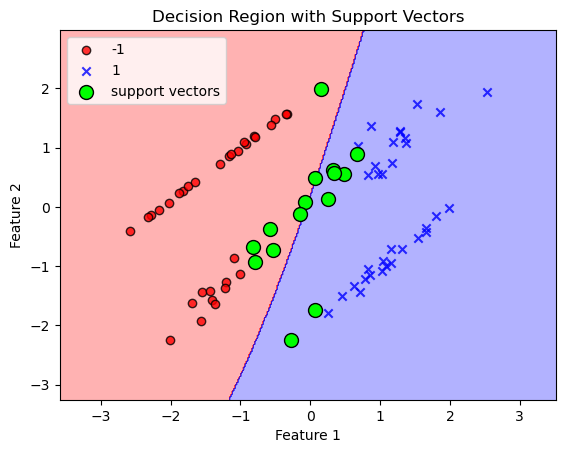

C:\Users\ericg\AppData\Local\Temp\ipykernel_17228\3760780184.py:231: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


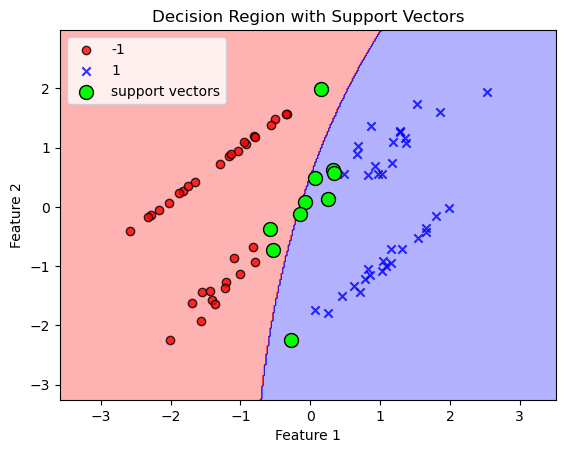


--- Scratch Implementation (Polynomial Kernel) ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Number of support vectors: 15

--- scikit-learn Implementation (Polynomial Kernel) ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Number of support vectors: 10


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap

class ScratchSVMClassifier():
    """
    SVM classifier implemented from scratch.

    Parameters
    ----------
    num_iter : int
        Number of iterations
    lr : float
        Learning rate
    kernel : str
        Type of kernel function. 'linear' or 'poly'
    threshold : float
        Threshold for selecting support vectors
    verbose : bool
        True to output learning process
    gamma : float
        Coefficient for the polynomial kernel
    theta0 : float
        Constant term in the polynomial kernel
    degree : int
        Degree of the polynomial kernel

    Attributes
    ----------
    self.n_support_vectors : int
        Number of support vectors
    self.index_support_vectors : ndarray, shape (n_support_vectors,)
        Indices of support vectors
    self.X_sv : ndarray, shape(n_support_vectors, n_features)
        Feature vectors of support vectors
    self.lam_sv : ndarray, shape(n_support_vectors, 1)
        Lagrange multipliers of support vectors
    self.y_sv : ndarray, shape(n_support_vectors, 1)
        Labels of support vectors

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False, gamma=1.0, theta0=0.0, degree=1):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.theta0 = theta0
        self.degree = degree
        self.lam = None
        self.X_sv = None
        self.y_sv = None
        self.lam_sv = None
        self.index_support_vectors = None
        self.n_support_vectors = None

    def _linear_kernel(self, X1, X2):
        """
        Linear kernel function

        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Samples
        X2 : ndarray, shape (n_samples2, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples1, n_samples2)
            Kernel matrix
        """
        return np.dot(X1, X2.T)

    def _polynomial_kernel(self, X1, X2):
        """
        Polynomial kernel function

        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Samples
        X2 : ndarray, shape (n_samples2, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples1, n_samples2)
            Kernel matrix
        """
        return (self.gamma * np.dot(X1, X2.T) + self.theta0) ** self.degree

    def _kernel_function(self, X1, X2):
        """
        Select kernel function

        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Samples
        X2 : ndarray, shape (n_samples2, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples1, n_samples2)
            Kernel matrix
        """
        if self.kernel == 'linear':
            return self._linear_kernel(X1, X2)
        elif self.kernel == 'poly':
            return self._polynomial_kernel(X1, X2)
        else:
            raise ValueError("Invalid kernel type.")

    def _update_lagrange_multipliers(self, X, y):
        """
        Update Lagrange multipliers

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples, )
            Training data correct values
        """
        n_samples = X.shape[0]
        if self.lam is None:
            self.lam = np.zeros(n_samples)

        for i in range(n_samples):
            update = 1 - np.sum(self.lam * y[i] * y * self._kernel_function(X[i].reshape(1, -1), X).flatten())
            self.lam[i] += self.lr * update
            if self.lam[i] < 0:
                self.lam[i] = 0

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If validation data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples, )
            Training data correct values
        X_val : ndarray, shape (n_samples, n_features)
            Validation data features
        y_val : ndarray, shape (n_samples, )
            Validation data correct values
        """
        y = y.astype(int) # Convert labels to integer type
        n_samples = X.shape[0]
        self.lam = np.random.rand(n_samples) # Initialize Lagrange multipliers

        for i in range(self.iter):
            self._update_lagrange_multipliers(X, y)
            if self.verbose:
                print(f"Iteration {i+1}/{self.iter}")

        # Determine support vectors based on the threshold
        self.index_support_vectors = np.where(self.lam > self.threshold)[0]
        self.n_support_vectors = len(self.index_support_vectors)
        self.X_sv = X[self.index_support_vectors]
        self.y_sv = y[self.index_support_vectors].reshape(-1, 1)
        self.lam_sv = self.lam[self.index_support_vectors].reshape(-1, 1)

        if self.verbose:
            print(f"Number of support vectors: {self.n_support_vectors}")
            print("Support vector indices:", self.index_support_vectors)

    def predict(self, X):
        """
        Estimate labels using the SVM classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples

        Returns
        -------
        ndarray, shape (n_samples, 1)
            Estimated results by the SVM classifier
        """
        if not hasattr(self, 'X_sv'):
            raise Exception("Fit the model first.")

        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)

        for i in range(n_samples):
            # Calculate kernel values between the data to predict and support vectors
            kernel_values = self._kernel_function(X[i].reshape(1, -1), self.X_sv)

            # Calculate the decision function
            decision_function = np.sum(self.lam_sv.flatten() * self.y_sv.flatten() * kernel_values.flatten())

            # Predict the label based on the sign of the decision function
            y_pred[i] = np.sign(decision_function)

        return np.sign(y_pred).astype(int).reshape(-1, 1)

# Visualization function
def plot_decision_regions_svm(X, y, classifier, support_vectors=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 'x', '^', 's', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight support vectors
    if support_vectors is not None:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    c='lime', marker='o', s=100, edgecolor='black', label='support vectors')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.title('Decision Region with Support Vectors')
    plt.show()

# Prepare Simple Dataset 1
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=2, random_state=42)
y[y == 0] = -1  # Convert labels to -1, 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict with the Scratch implementation using a polynomial kernel
scratch_svm_poly = ScratchSVMClassifier(num_iter=100, lr=0.01, kernel='poly', verbose=True, gamma=1.0, theta0=1.0, degree=2)
scratch_svm_poly.fit(X_train, y_train)
y_pred_scratch_poly = scratch_svm_poly.predict(X_test)

# Train with scikit-learn using a polynomial kernel for comparison
sklearn_svm_poly = SVC(kernel='poly', gamma=1.0, coef0=1.0, degree=2)
sklearn_svm_poly.fit(X_train, y_train)

# Visualize decision regions and support vectors (Scratch implementation - Polynomial Kernel)
plot_decision_regions_svm(X_train, y_train, scratch_svm_poly, support_vectors=scratch_svm_poly.X_sv)

# Visualize decision regions and support vectors (scikit-learn implementation - Polynomial Kernel)
plot_decision_regions_svm(X_train, y_train, sklearn_svm_poly, support_vectors=sklearn_svm_poly.support_vectors_)

# Calculate and display evaluation metrics (Scratch implementation - Polynomial Kernel)
accuracy_scratch_poly = accuracy_score(y_test, y_pred_scratch_poly)
precision_scratch_poly = precision_score(y_test, y_pred_scratch_poly)
recall_scratch_poly = recall_score(y_test, y_pred_scratch_poly)

print("\n--- Scratch Implementation (Polynomial Kernel) ---")
print(f"Accuracy: {accuracy_scratch_poly}")
print(f"Precision: {precision_scratch_poly}")
print(f"Recall: {recall_scratch_poly}")
print(f"Number of support vectors: {scratch_svm_poly.n_support_vectors}")

# Calculate and display evaluation metrics (scikit-learn - Polynomial Kernel)
y_pred_sklearn_poly = sklearn_svm_poly.predict(X_test)
accuracy_sklearn_poly = accuracy_score(y_test, y_pred_sklearn_poly)
precision_sklearn_poly = precision_score(y_test, y_pred_sklearn_poly)
recall_sklearn_poly = recall_score(y_test, y_pred_sklearn_poly)

print("\n--- scikit-learn Implementation (Polynomial Kernel) ---")
print(f"Accuracy: {accuracy_sklearn_poly}")
print(f"Precision: {precision_sklearn_poly}")
print(f"Recall: {recall_sklearn_poly}")
print(f"Number of support vectors: {sklearn_svm_poly.n_support_.sum()}")